## Exercise 1: A simple CNN classifier

1. Download the CIFAR10 dataset using `tensorflow.keras.datasets.cifar10.load_data()`. This dataset contains 60k (50k training / 10k test) low resolution color images for 10 classes: `['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']`.

In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [3]:
data = tf.keras.datasets.cifar10.load_data()

(x_train, y_train), (x_test, y_test) = data
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']
# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 10)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 10)


2. Verify data by plotting image samples.

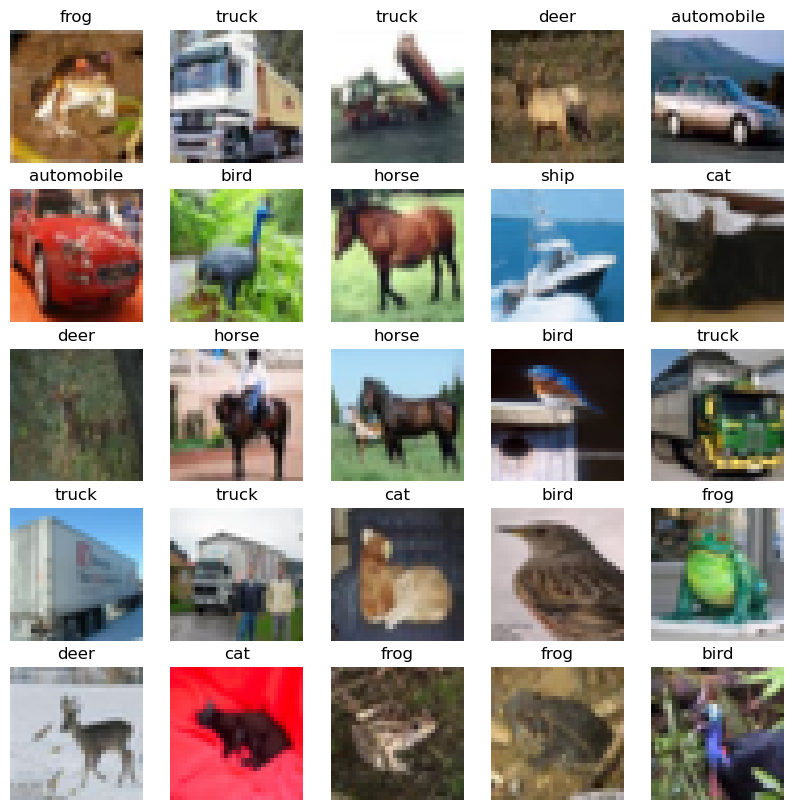

In [47]:
# Plotting the first 25 images in the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(labels[np.argmax(y_train[i])])
    plt.axis("off")
plt.show()

3. Allocate a sequential model containing a normalization layer after determining the best choice for this particular dataset. After this initial normalization layer, threat images as a flatten layer, and build a classifier. Train the classifier using the test data as validation set. Store and plot the accuracy for the training and validation achieved with this approach.

In [6]:
flatmodel = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

flatmodel.summary()

2025-05-10 22:43:43.321873: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Training the model
flatmodel.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
log_dir = "logs/fit/flat" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = flatmodel.fit(x_train, y_train, epochs=50,
                         validation_data=(x_test, y_test),
                         callbacks=[early_stopping, tensorboard_callback])
# Evaluate the model
test_loss, test_acc = flatmodel.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2811 - loss: 2.0471 - val_accuracy: 0.3677 - val_loss: 1.8134
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3464 - loss: 1.8920 - val_accuracy: 0.3775 - val_loss: 1.8053
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3641 - loss: 1.8536 - val_accuracy: 0.3789 - val_loss: 1.7883
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3698 - loss: 1.8393 - val_accuracy: 0.3227 - val_loss: 1.9657
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3762 - loss: 1.8173 - val_accuracy: 0.3580 - val_loss: 1.8557
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3799 - loss: 1.8074 - val_accuracy: 0.3615 - val_loss: 1.8553
313/313 - 0s - 680us/step - accuracy: 0.3789 - loss: 1.7883

Test accuracy: 0.3788999915122986


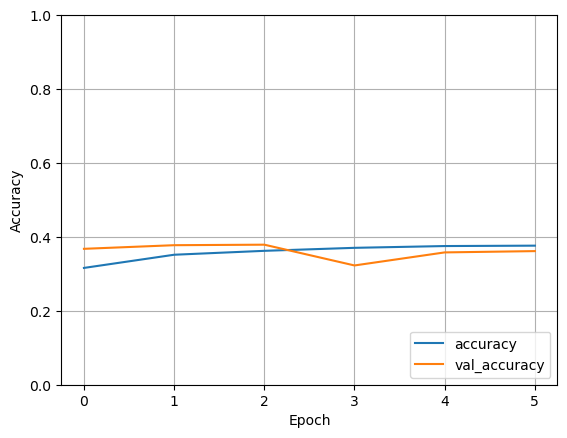

In [8]:
# Plot the training history

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

4. Redesign the previous model by replacing the initial flatten layer with convolutional layers (`tf.keras.layers.Conv2D`) followed by a Max Pooling 2D layer (`tf.keras.layers.MaxPooling2D`). Try this model with 3 consecutive layers. Compare the results with the previous model.


In [9]:
# Building the model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Input(shape=(32, 32, 3)), # Input layer 32x32x3
    tf.keras.layers.Rescaling(1./255), # normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # Convolutional layer 3x3, 32 filters -> (32-3+1)x(32-3+1)x32 = 30x30x32    
    tf.keras.layers.MaxPooling2D((2, 2)), # Pooling layer 2x2, reducing size to 16x16x32
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Second convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1) # TensorBoard callback for visualization 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model
history = model.fit(
    x_train,
    y_train, 
    epochs=50, 
    batch_size=64, 
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2), tensorboard_callback]
)
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2921 - loss: 1.8989 - val_accuracy: 0.4808 - val_loss: 1.4323
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5097 - loss: 1.3648 - val_accuracy: 0.5596 - val_loss: 1.2444
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5726 - loss: 1.1923 - val_accuracy: 0.5860 - val_loss: 1.1714
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6195 - loss: 1.0746 - val_accuracy: 0.6323 - val_loss: 1.0515
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6528 - loss: 0.9865 - val_accuracy: 0.6581 - val_loss: 0.9780
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6705 - loss: 0.9445 - val_accuracy: 0.6793 - val_loss: 0.9363
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6935 - loss: 0.8722 - val_accuracy: 0.6744 - val_loss: 0.9267
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7131 - loss: 0.8238 - val_accu

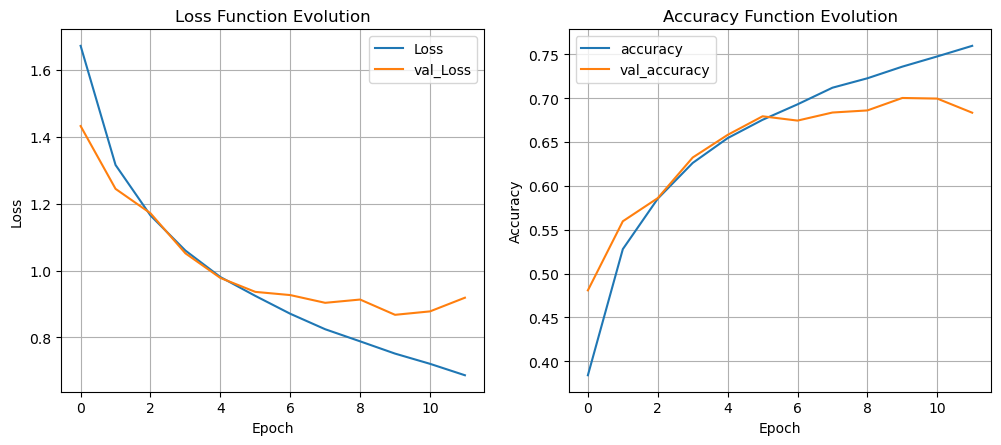

In [11]:
plt.figure(figsize=(12, 16))
# Plotting the training history
plt.subplot(3, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6981 - loss: 0.9108
Test Accuracy : 69.34%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


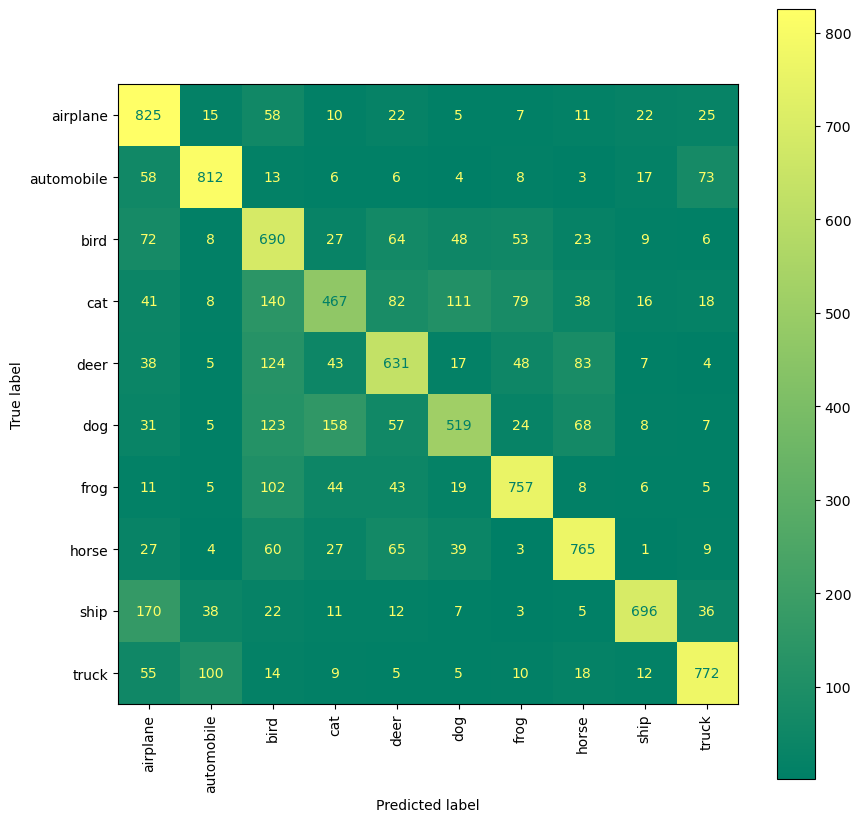

In [12]:
# Confusion matrix
evaluation = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


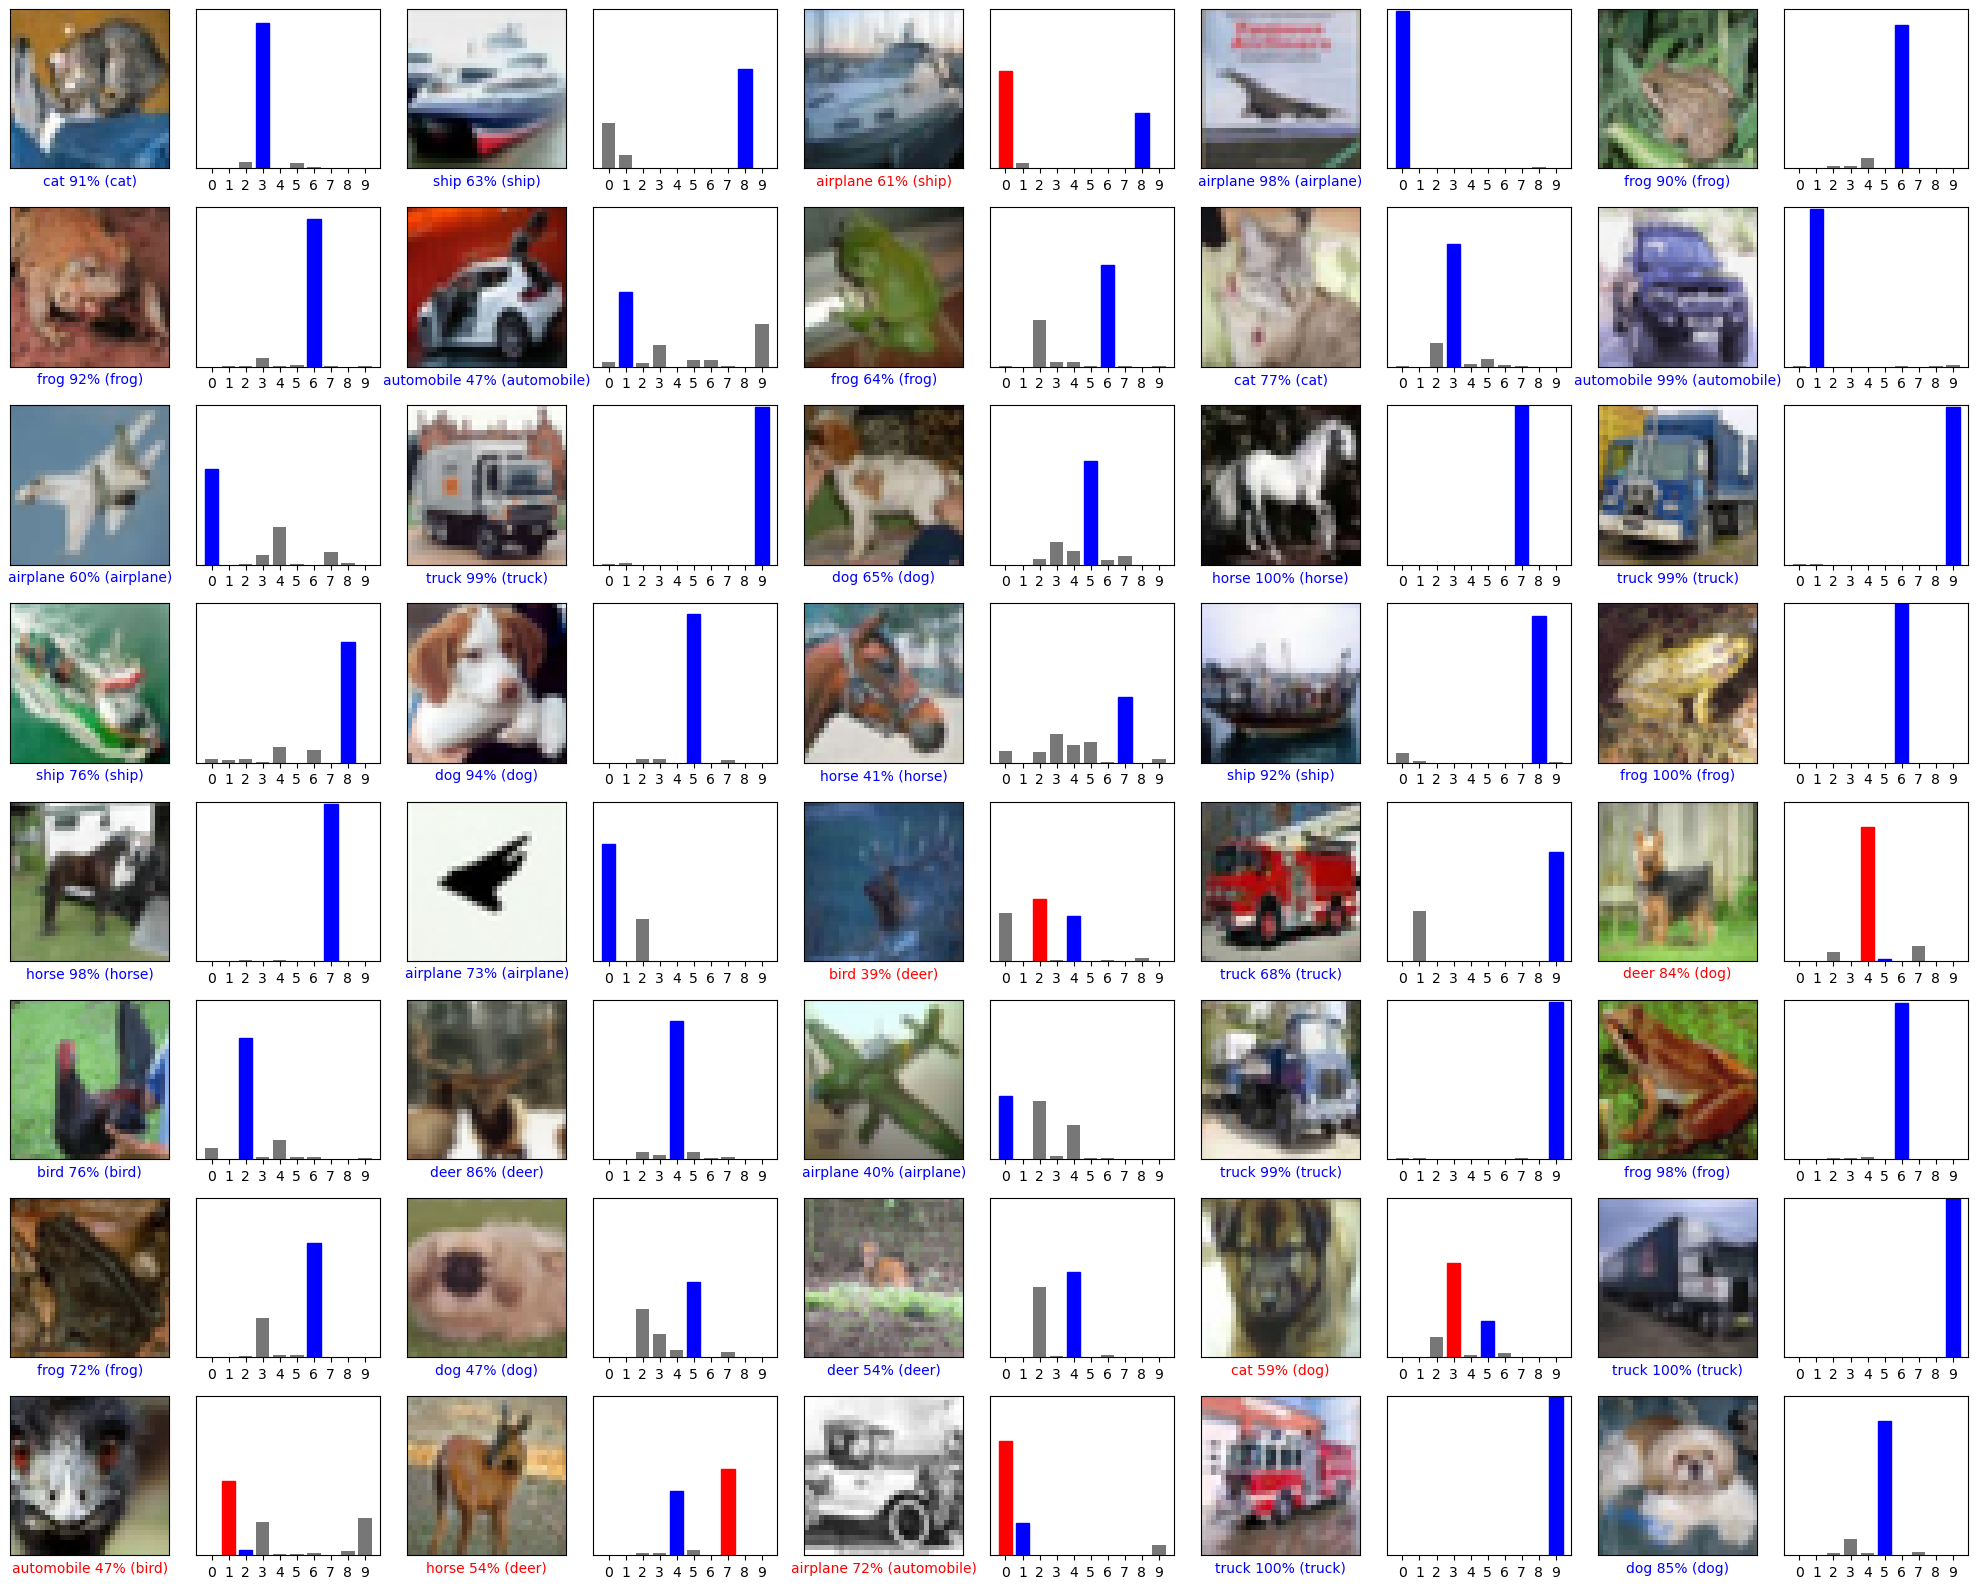

In [16]:
predictions = model.predict(x_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_true, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_true)
plt.tight_layout()
plt.show()

## Exercise 2: Localization and classification

1. We provide images of 75x75 pixels containing MNIST digits in the `data.tgz` folder above. Each image contains only one digit of 28x28 pixels placed in a random position of the image. The files `training_images.npy` and `validation_images.npy` contains the images, `training_labels.npy` and `validation_labels.npy` the labels of each image, `training_boxes.npy` and `validation_boxes.npy` the 4 coordinates of the bounding boxes (xmin, ymin, xmax, ymax). Load data and plot samples.

In [3]:
train_images = np.load('data/training_images.npy')    # shape (N_train, 75,75)
train_labels = np.load('data/training_labels.npy')    # shape (N_train,)
train_boxes  = np.load('data/training_boxes.npy')     # shape (N_train,4)

val_images   = np.load('data/validation_images.npy')
val_labels   = np.load('data/validation_labels.npy')
val_boxes    = np.load('data/validation_boxes.npy')

In [4]:
train_images[1,...,0].shape

(75, 75)

In [5]:
train_boxes[1]*75

array([16.,  0., 44., 28.], dtype=float32)

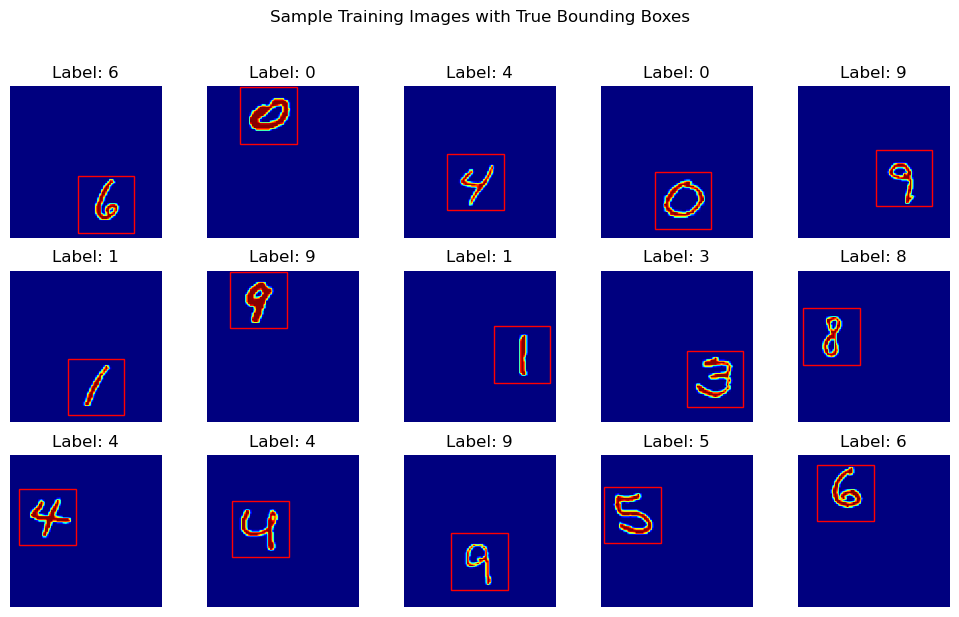

In [6]:
# labels from one-hot to integer
t_labels = np.argmax(train_labels, axis=1)  # (N_train,)
v_labels = np.argmax(val_labels, axis=1)  # (N_val,)

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = train_images[i, ..., 0] # remove channel dimension 
    xmin, ymin, xmax, ymax = train_boxes[i]*75 # rescale to original image size
    ax.imshow(img, cmap='jet') # other cmap options: 'gray', 'hot', 'jet'
    # true box (solid line)
    rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                         fill=False, linewidth=1, edgecolor='red')
    ax.add_patch(rect)
    ax.set_title(f"Label: {t_labels[i]}")
    ax.axis('off')
plt.suptitle("Sample Training Images with True Bounding Boxes", y=1.02)
plt.tight_layout()
plt.show()

2. Construct a custom Keras model (using the functional API) with the following components: a feature extractor using a CNN followed by a flatten and a dense layer and two final end-points: a classifier (10 classes) and a bounding box regressor (4 coordinates). Use the categorical cross-entropy loss function for the classifier and the MSE for the bounding box regressor.

In [7]:
inputs = tf.keras.Input(shape=(75, 75, 1), name='input_image')
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)    # → 73×73×32
x = tf.keras.layers.MaxPooling2D((2, 2))(x)                     # → 36×36×32
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)    # → 34×34×64
x = tf.keras.layers.MaxPooling2D((2, 2))(x)                     # → 17×17×64
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)    # → 15×15×64
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

# 2) Classification head (10‐way softmax)
class_out = tf.keras.layers.Dense(10, activation='softmax', name='class_out')(x)

# 3) Regression head (4 real‐valued coords)
#    Use `linear` so the network can predict any real numbers
bbox_out  = tf.keras.layers.Dense(4, activation='linear', name='bbox_out')(x)

# 4) Define & compile the model
model = tf.keras.Model(inputs=inputs, outputs=[class_out, bbox_out])

model.compile(
    optimizer='adam',
    loss={
        'class_out': 'categorical_crossentropy',
        'bbox_out':  'mse'
    },
    metrics={
        'class_out': 'accuracy'
    }
)

model.summary()

2025-05-11 22:26:54.696876: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 75, 75, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 75, 75, 1) │          0 │ input_image[0][0] │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 73, 73,    │        320 │ rescaling[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 36, 36,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 34, 34,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 17, 17,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 15, 15,    │     36,928 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 14400)     │          0 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    921,664 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_out (Dense)   │ (None, 10)        │        650 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox_out (Dense)    │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 978,318 (3.73 MB)

 Trainable params: 978,318 (3.73 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_images,
    {'class_out': train_labels, 'bbox_out': train_boxes},
    validation_data=(
        val_images,
        {'class_out': val_labels,   'bbox_out': val_boxes}
    ),
    epochs=10,
    batch_size=128,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
)

Epoch 1/10


2025-05-11 22:27:02.496043: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1350000000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 193ms/step - bbox_out_loss: 0.0478 - class_out_accuracy: 0.1117 - class_out_loss: 2.3016 - loss: 2.3494 - val_bbox_out_loss: 0.0091 - val_class_out_accuracy: 0.2072 - val_class_out_loss: 2.1349 - val_loss: 2.1432
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 189ms/step - bbox_out_loss: 0.0085 - class_out_accuracy: 0.2349 - class_out_loss: 2.0817 - loss: 2.0902 - val_bbox_out_loss: 0.0113 - val_class_out_accuracy: 0.4603 - val_class_out_loss: 1.4977 - val_loss: 1.5096
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 190ms/step - bbox_out_loss: 0.0115 - class_out_accuracy: 0.5851 - class_out_loss: 1.2250 - loss: 1.2366 - val_bbox_out_loss: 0.0098 - val_class_out_accuracy: 0.7353 - val_class_out_loss: 0.7924 - val_loss: 0.8039
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 192ms/step - bbox_out_loss: 0.0070 - class_out_accuracy: 0.7752 - class_out_loss: 0.6943 - loss: 0.7013 - val_bbox_out_loss: 0.0053 - val_class_out_accuracy: 0.8256 - val_class_out_loss: 0.5567 - 

3. Plot the classification and bounding box losses. Verify the results on the validation dataset by plotting samples and computing the IoU. Evaluate the total number of good and bad bounding box predictions using an IoU threshold of 0.6.

In [10]:
model.save('model/ex2.keras')      # creates a single HDF5 file

In [ ]:
# Later, to reload:
from tensorflow.keras.models import load_model
model = load_model('ex2.keras')

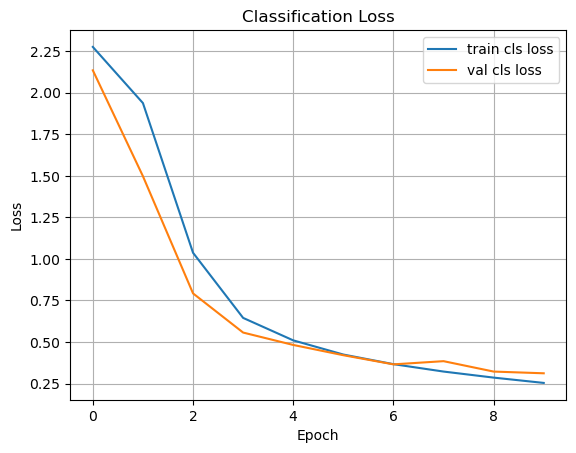

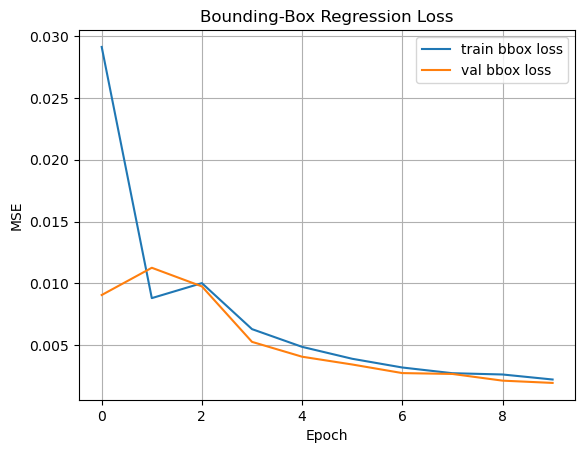

In [13]:
plt.figure()
plt.plot(history.history['class_out_loss'],      label='train cls loss')
plt.plot(history.history['val_class_out_loss'],  label='val cls loss')
plt.title('Classification Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['bbox_out_loss'],      label='train bbox loss')
plt.plot(history.history['val_bbox_out_loss'],  label='val bbox loss')
plt.title('Bounding‐Box Regression Loss')
plt.xlabel('Epoch'); plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

In [14]:
#  Predict on validation set & compute IoU for each sample
pred_cls, pred_boxes = model.predict(val_images)

def compute_iou(boxA, boxB):
    xminA, yminA, xmaxA, ymaxA = boxA
    xminB, yminB, xmaxB, ymaxB = boxB
    xA = max(xminA, xminB)
    yA = max(yminA, yminB)
    xB = min(xmaxA, xmaxB)
    yB = min(ymaxA, ymaxB)
    interW = max(0, xB - xA)
    interH = max(0, yB - yA)
    interA = interW * interH
    areaA = (xmaxA-xminA)*(ymaxA-yminA)
    areaB = (xmaxB-xminB)*(ymaxB-yminB)
    return interA / (areaA + areaB - interA + 1e-8)

ious = np.array([
    compute_iou(pb, tb)
    for pb, tb in zip(pred_boxes, val_boxes)
])

good = np.sum(ious >= 0.6)
bad  = np.sum(ious <  0.6)
print(f"Good boxes (IoU ≥ 0.6): {good}")
print(f"Bad  boxes (IoU <  0.6): {bad}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Good boxes (IoU ≥ 0.6): 8231
Bad  boxes (IoU <  0.6): 1769


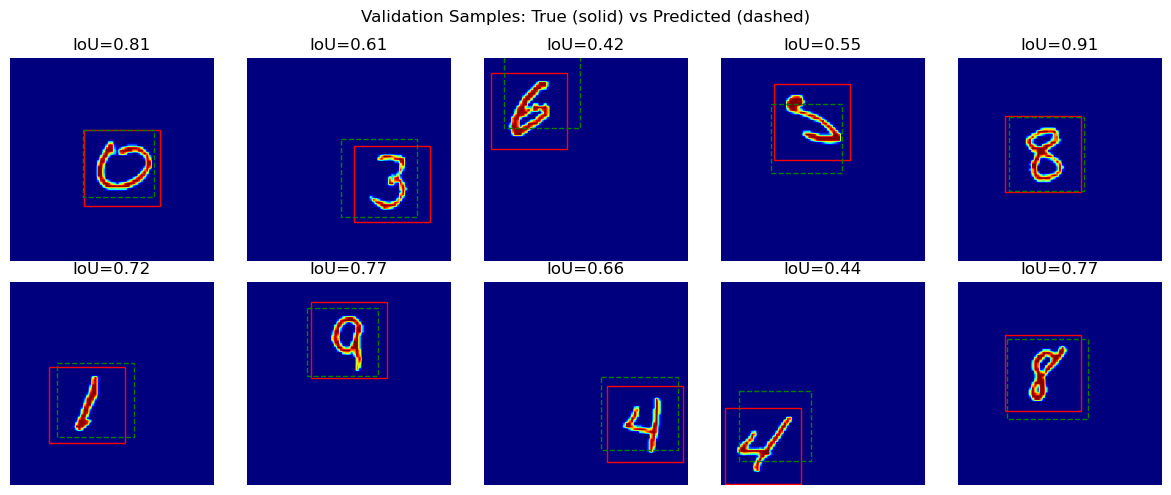

In [19]:
#  Plot a few validation images with true (solid) vs. predicted (dashed) boxes
import random

sample_idxs = random.sample(range(len(val_images)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12,5))
axes = axes.flatten()
for ax, i in zip(axes, sample_idxs):
    img      = val_images[i,...,0]
    true_box = val_boxes[i] *75
    pred_box = pred_boxes[i]*75
    ax.imshow(img, cmap='jet')
    # true box: solid
    rect_t = plt.Rectangle((true_box[0], true_box[1]),
                           true_box[2]-true_box[0],
                           true_box[3]-true_box[1],
                           fill=False, linewidth=1, edgecolor='red')
    ax.add_patch(rect_t)
    # pred box: dashed
    rect_p = plt.Rectangle((pred_box[0], pred_box[1]),
                           pred_box[2]-pred_box[0],
                           pred_box[3]-pred_box[1],
                           fill=False, linewidth=1, linestyle='--', edgecolor='green')
    ax.add_patch(rect_p)
    ax.set_title(f"IoU={ious[i]:.2f}")
    ax.axis('off')
plt.suptitle("Validation Samples: True (solid) vs Predicted (dashed)")
plt.tight_layout()
plt.show()
